<a href="https://colab.research.google.com/github/rubenguerra/datascience/blob/master/XGBoost_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install xgboost

In [19]:
# Bajamos las bibliotecas necesarias

from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


In [11]:

# Cargamos el dataset
dataset = loadtxt('/content/pima-indians-diabetes.csv', delimiter = ',')



In [12]:
# Dividimos los datos en X & y
X = dataset[:, 0:8]
y = dataset[:, 8]



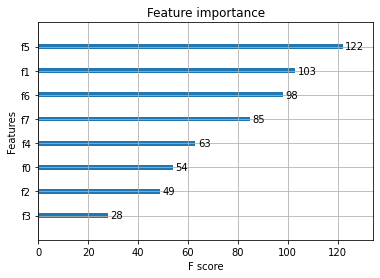

In [16]:
import matplotlib.pyplot as plt


# Se entrena el modelo con los datos de entrenamiento
modelo = XGBClassifier()
modelo.fit(X, y)

# Grafica de la importancia de la característica
plot_importance(modelo)
plt.show()

# Hiperparámetros

In [17]:
n_estimadores = [50, 100, 150, 200]
max_prof = [2, 4, 6, 8]

parame_gri = dict(n_estimadores = n_estimadores, max_prof=max_prof)

In [18]:
parame_gri

{'max_prof': [2, 4, 6, 8], 'n_estimadores': [50, 100, 150, 200]}

In [20]:
modelo = XGBClassifier()
rata_aprendizaje = [1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.3]
parame_gri = dict(rata_aprendizaje=rata_aprendizaje)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
busca_grid = GridSearchCV(modelo, param_grid=parame_gri, scoring='neg_log_loss', n_jobs=-1, cv=kfold)
result_grid = busca_grid.fit(X, y)

In [22]:
# Resumen de los resultados

print('Mejor: %f usando %s' % (result_grid.best_score_, result_grid.best_params_))
media = result_grid.cv_results_['mean_test_score']
desviacion_standar = result_grid.cv_results_['std_test_score']
parametros = result_grid.cv_results_['params']
for med, desv, param in zip(media, desviacion_standar, parametros):
  print('%f (%f) con: %r' % (med, desv, param))

Mejor: -0.487211 usando {'rata_aprendizaje': 0.0001}
-0.487211 (0.090035) con: {'rata_aprendizaje': 0.0001}
-0.487211 (0.090035) con: {'rata_aprendizaje': 0.001}
-0.487211 (0.090035) con: {'rata_aprendizaje': 0.01}
-0.487211 (0.090035) con: {'rata_aprendizaje': 0.1}
-0.487211 (0.090035) con: {'rata_aprendizaje': 0.2}
-0.487211 (0.090035) con: {'rata_aprendizaje': 0.3}
